In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_transform_utils import rename_columns, parse_columns

# Tratamento de Dados

In [3]:
raw_data = pd.read_csv('./assets/survey_data.csv')

In [4]:
parsed_data = raw_data.pipe(rename_columns).pipe(parse_columns)

In [4]:
parsed_data.sample(10)

,reference_date,age_group,college_term,diagnosed_with_ler,practice_exercises,practice_stretching,has_ergonomic_chair,has_wrist_support,has_any_disease,has_tendinitis,...,has_backache,has_bursitis,has_dry_eye_syndrome,has_eyestrain,already_graduated,less_then_1hour,between_1_and_3_hours,between_3_and_5_hours,between_5_and_8_hours,more_then_8_hours
21,2022-06-28,18-21,6,0,5,1,5,1,1,0,...,1,0,0,0,0,0,0,0,0,1
85,2022-07-12,18-21,1,0,2,2,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25,2022-06-28,18-21,6,0,1,2,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
37,2022-07-06,<18,1,0,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
49,2022-07-12,18-21,1,1,2,3,4,5,1,0,...,0,0,0,1,0,0,0,0,0,1
83,2022-07-12,18-21,4,1,1,2,4,1,1,1,...,1,0,0,0,0,0,0,1,0,0
23,2022-06-28,18-21,5,0,3,1,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0
96,2022-08-01,22-25,None,0,1,1,1,1,1,0,...,0,1,0,1,1,0,0,0,1,0
64,2022-07-12,22-25,8,0,2,2,4,2,1,0,...,1,0,0,1,0,0,0,0,1,0
20,2022-06-28,18-21,6,1,4,2,4,1,1,0,...,1,1,0,1,0,0,0,0,0,1


# Análise dos dados

## Distribuiçao

### Idade

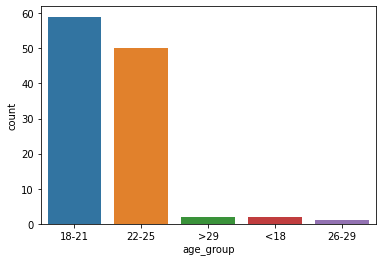

In [5]:
age = sns.countplot(x="age_group", data=parsed_data)

In [6]:
age_group = parsed_data.groupby('age_group').count()[['reference_date']].rename(columns={'reference_date': 'count'})

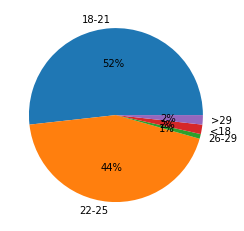

In [7]:
plt.pie(age_group['count'], labels=['18-21', '22-25', '26-29', '<18', '>29'], autopct = '%0.0f%%')
plt.show()

Pelo gráfico percebemos que:
- 52% da amostra possui entre 18-21 anos
- 44% entre 22-25 anos
- 2% maior que 29 anos
- 1% menor que 18 anos
- 1% entre 26 e 29 anos

Pela distribuiçao é possivel perceber que a amostra é muito jovem e pode significar inviesamento dos dados

### Doença

In [19]:
disease = parsed_data.groupby('has_any_disease')['has_any_disease'].count()

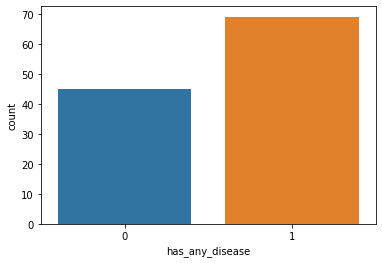

In [20]:
disease_plot = sns.countplot(x="has_any_disease", data=parsed_data, )

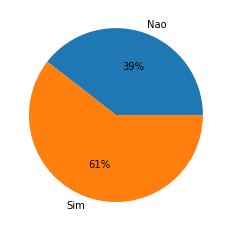

In [21]:
plt.pie(disease, labels=['Nao', 'Sim'], autopct = '%0.0f%%')
plt.show()

Pelo plot podemos perceber que 39% dos respondentes nao possuem nenhuma doença relacionada a LER e 61% possuem

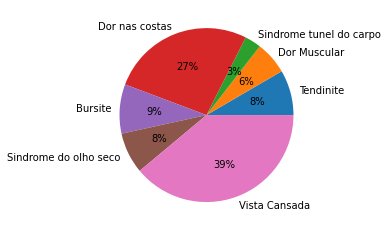

In [34]:
all_diseases = parsed_data[['has_tendinitis', 'has_muscle_aches', 'has_carpal_tunnel_syndrome', 'has_backache', 'has_bursitis', 'has_dry_eye_syndrome', 'has_eyestrain']].sum()
plt.pie(all_diseases, labels = ['Tendinite', 'Dor Muscular', 'Sindrome tunel do carpo', 'Dor nas costas', 'Bursite', 'Sindrome do olho seco', 'Vista Cansada'],autopct = '%0.0f%%')
plt.show()

Podemos perceber que a maioria dos respondentes possui vista cansada e dor nas costas

## Correlação entre variáveis

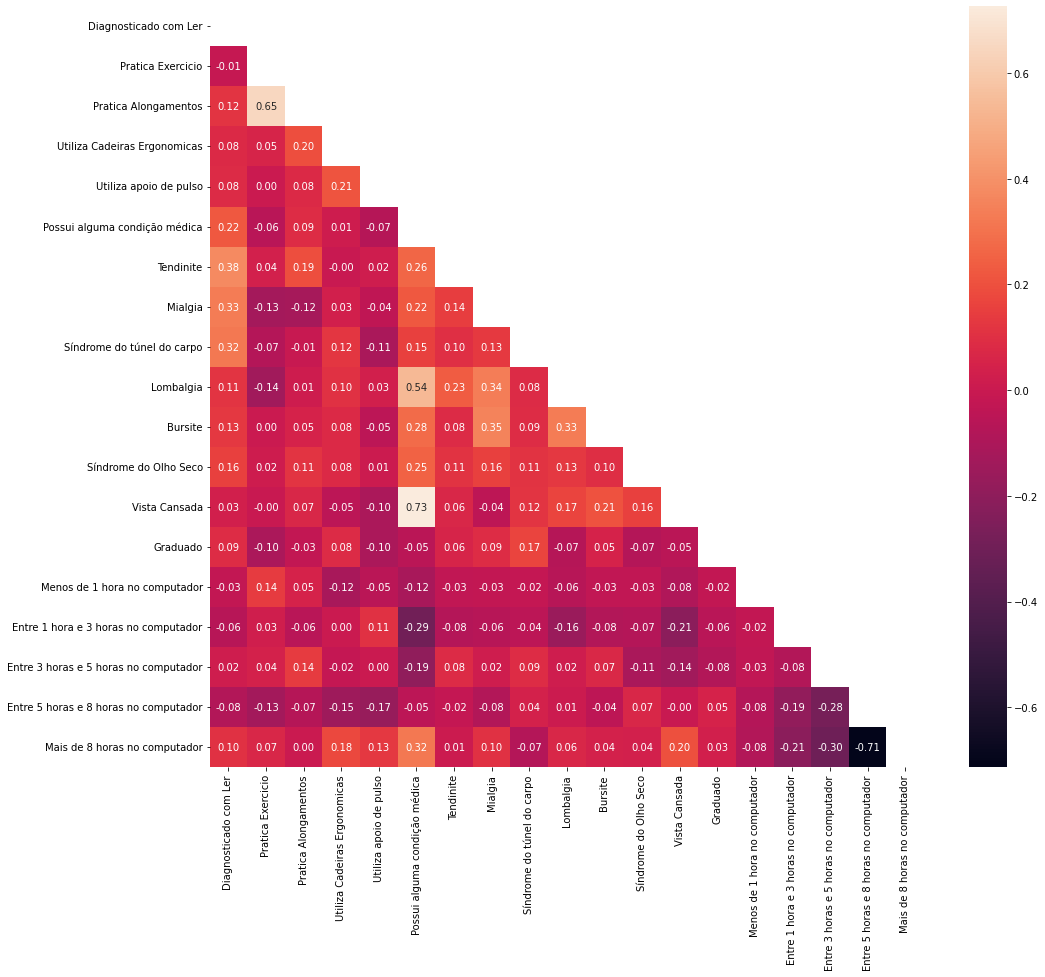

In [6]:
labels = [
    "Diagnosticado com Ler", 
    "Pratica Exercicio", 
    "Pratica Alongamentos", 
    "Utiliza Cadeiras Ergonomicas",
    "Utiliza apoio de pulso",
    "Possui alguma condição médica",
    "Tendinite",
    "Mialgia",
    "Síndrome do túnel do carpo",
    "Lombalgia",
    "Bursite",
    "Síndrome do Olho Seco",
    "Vista Cansada",
    "Graduado",
    "Menos de 1 hora no computador",
    "Entre 1 hora e 3 horas no computador",
    "Entre 3 horas e 5 horas no computador",
    "Entre 5 horas e 8 horas no computador",
    "Mais de 8 horas no computador",
]


data_corr = parsed_data.corr(method='pearson')
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 14))
sns.heatmap(data_corr, mask=mask, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels )
plt.show()

Pela tabela de correlação, podemos perceber que temos algumas correlações interessantes:
- Pessoas praticam algum exercicio, também praticam algum tipo de alongamento. Fato ja esperado
- Pessoas que passam mais de 8 horas no computador possui uma maior incidencia de doenças relacionadas a LER
- Nao existe relaçao entre praticar exercicio e ter alguma doença relacionada a LER
- Nao existe relaçao entre possuir uma cadeira ergonomica e ter alguima doenca relacionada a LER
- Nao possui relacao entre possuir apoio de pulso e ter alguma doença relacioanda a LER